<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Facebook-Prophet" data-toc-modified-id="Facebook-Prophet-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Facebook Prophet</a></span></li></ul></li><li><span><a href="#Import-Packages" data-toc-modified-id="Import-Packages-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import Packages</a></span></li><li><span><a href="#Load-The-Walmart-Dataset---Store-2-Item-28-data" data-toc-modified-id="Load-The-Walmart-Dataset---Store-2-Item-28-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load The Walmart Dataset - Store 2 Item 28 data</a></span></li><li><span><a href="#Visualize-times-series-sales-of-item-28-at-store-2" data-toc-modified-id="Visualize-times-series-sales-of-item-28-at-store-2-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Visualize times series sales of item 28 at store 2</a></span></li><li><span><a href="#Forecasting-with-Facebook-Prophet" data-toc-modified-id="Forecasting-with-Facebook-Prophet-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Forecasting with Facebook Prophet</a></span><ul class="toc-item"><li><span><a href="#Prepare-Data-for-Prophet" data-toc-modified-id="Prepare-Data-for-Prophet-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Prepare Data for Prophet</a></span></li><li><span><a href="#Train-Model" data-toc-modified-id="Train-Model-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Train Model</a></span></li><li><span><a href="#Forecast" data-toc-modified-id="Forecast-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Forecast</a></span><ul class="toc-item"><li><span><a href="#Forecast-Dataframe" data-toc-modified-id="Forecast-Dataframe-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>Forecast Dataframe</a></span></li><li><span><a href="#Forecast-Plot" data-toc-modified-id="Forecast-Plot-5.3.2"><span class="toc-item-num">5.3.2&nbsp;&nbsp;</span>Forecast Plot</a></span></li><li><span><a href="#Trend-Changepoints" data-toc-modified-id="Trend-Changepoints-5.3.3"><span class="toc-item-num">5.3.3&nbsp;&nbsp;</span>Trend Changepoints</a></span></li><li><span><a href="#Component-Plots" data-toc-modified-id="Component-Plots-5.3.4"><span class="toc-item-num">5.3.4&nbsp;&nbsp;</span>Component Plots</a></span></li></ul></li><li><span><a href="#Evaluate-model" data-toc-modified-id="Evaluate-model-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Evaluate model</a></span><ul class="toc-item"><li><span><a href="#Prophet's-Diagnostic-Tools" data-toc-modified-id="Prophet's-Diagnostic-Tools-5.4.1"><span class="toc-item-num">5.4.1&nbsp;&nbsp;</span>Prophet's Diagnostic Tools</a></span><ul class="toc-item"><li><span><a href="#Cross-Validation" data-toc-modified-id="Cross-Validation-5.4.1.1"><span class="toc-item-num">5.4.1.1&nbsp;&nbsp;</span>Cross Validation</a></span></li><li><span><a href="#Fine-tuning-hyperparameters" data-toc-modified-id="Fine-tuning-hyperparameters-5.4.1.2"><span class="toc-item-num">5.4.1.2&nbsp;&nbsp;</span>Fine tuning hyperparameters</a></span></li></ul></li></ul></li><li><span><a href="#Best-Model" data-toc-modified-id="Best-Model-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Best Model</a></span></li><li><span><a href="#Best-Model-adding-US-Holidays" data-toc-modified-id="Best-Model-adding-US-Holidays-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Best Model adding US Holidays</a></span></li></ul></li><li><span><a href="#Saving-and-Loading-the-Best-model" data-toc-modified-id="Saving-and-Loading-the-Best-model-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Saving and Loading the Best model</a></span><ul class="toc-item"><li><span><a href="#Save-model" data-toc-modified-id="Save-model-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Save model</a></span></li><li><span><a href="#Load-model" data-toc-modified-id="Load-model-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Load model</a></span></li></ul></li><li><span><a href="#Comparing-all-results---SARIMA-models-vs-Prophet-models" data-toc-modified-id="Comparing-all-results---SARIMA-models-vs-Prophet-models-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Comparing all results - SARIMA models vs Prophet models</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></div>

# Introduction

In this notebook we introduce [Facebook Prophet](https://facebook.github.io/prophet/). Here you get the basics for building your first model with Facebook’s advanced forecasting tool and go further exploring it.

To illustrate how Prophet works we apply it to forecast sales using the same dataset used in the last notebook where we introduced SARIMAX models.


## Facebook Prophet

[Facebook Prophet](https://github.com/facebook/prophet)  is open-source library released by [Facebook’s Core Data Science team](https://research.fb.com/category/data-science/). It is available in [R](https://cran.r-project.org/web/packages/prophet/index.html) and [Python](https://pypi.org/project/prophet/).

Prophet is a procedure for `univariate (one variable)` time series forecasting data based on an `additive model`, and the implementation supports `trends, seasonality, and holidays`. It works best with time series that have `strong seasonal effects` and `several seasons` of historical data. Prophet is `robust` to missing data and shifts in the trend, and typically handles outliers well.

It is specially interesting for new users because of its `easy use` and capacity of `find automatically a good set of hyperparameters` for  the model. Therefore, it allows users without prior knowledge or experience of forecasting time series data start using it and get reasonably good results that are often equal or sometimes even better than the ones produced by the experts.

# Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from fbprophet import Prophet

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.width', None)
pd.set_option('display.max_rows', None)

# Load The Walmart Dataset - Store 2 Item 28 data

In order to compare Prophet with SARIMAX model we use the same dataset used in notebook 1. This dataset consists of a subset of the [Walmart data](https://www.kaggle.com/c/demand-forecasting-kernels-only/data): sales of item 28 (the most sold) at store 2 (the store with the highest sales). To forecast all sales of all stores we need to apply prophet to each of the 500 time series individually since Prophet process one variable at time. 

In [2]:
df_store_2_item_28 = pd.read_csv("../data/processed/sales_store_2_item_28.csv")

In [3]:
df_store_2_item_28.head()

,date,sales
0,2013-01-01,12
1,2013-01-02,16
2,2013-01-03,16
3,2013-01-04,20
4,2013-01-05,16


In [4]:
df_store_2_item_28.tail()

,date,sales
1821,2017-12-27,19
1822,2017-12-28,21
1823,2017-12-29,18
1824,2017-12-30,24
1825,2017-12-31,31


In [5]:
df_store_2_item_28.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1826 non-null   object
 1   sales   1826 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 28.7+ KB


# Visualize times series sales of item 28 at store 2

Before applying Facebook Prophet let's check on the characteristics of this time series. If you checked [notebook 1](https://github.com/MKB-Datalab/time-series-analysis-with-SARIMAX-and-Prophet/blob/master/notebooks/01-Intro_time_series_tutorial.ipynb), you are already familiar with these results and can jump to next section.

In [6]:
# select item 28 and keep only column sales
df_store_2_item_28['date']=pd.to_datetime(df_store_2_item_28['date'])
df_store_2_item_28_time = df_store_2_item_28.set_index('date')
df_store_2_item_28_time.head()

,sales
date,
2013-01-01,12
2013-01-02,16
2013-01-03,16
2013-01-04,20
2013-01-05,16


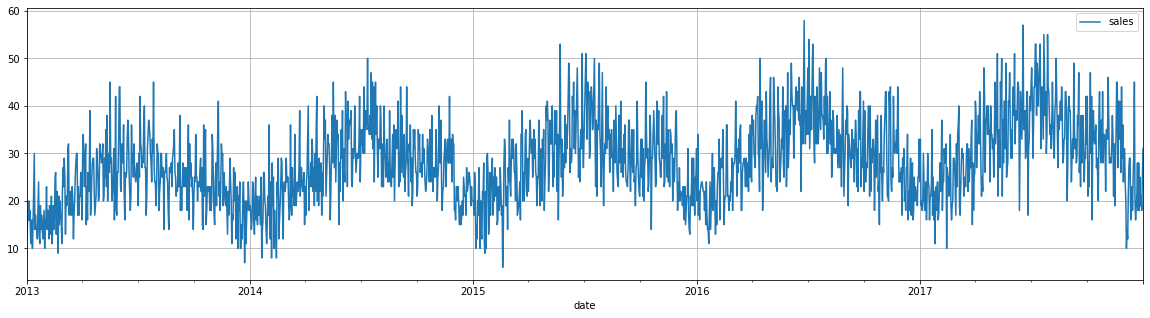

In [7]:
# Plot the entire time series diet and show gridlines
df_store_2_item_28_time.plot(grid=True,figsize=(20,5))
plt.show()

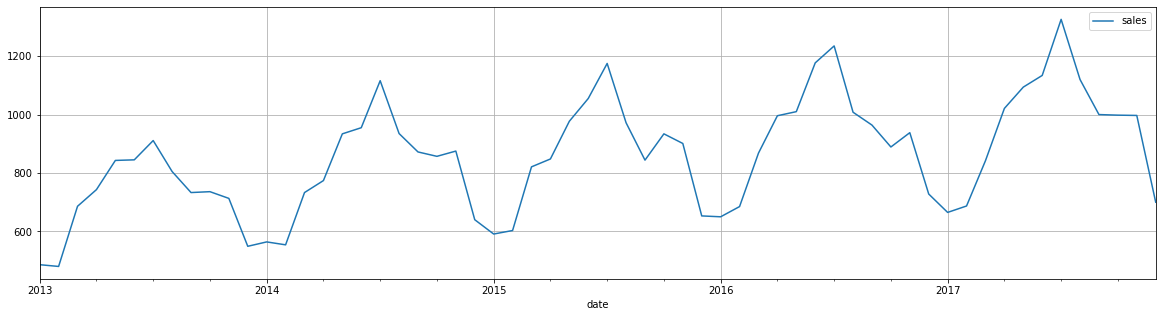

In [8]:
# Plot the entire time series diet and show gridlines
df_store_2_item_28_time.resample('M').sum().plot(grid=True,figsize=(20,5))
plt.show()

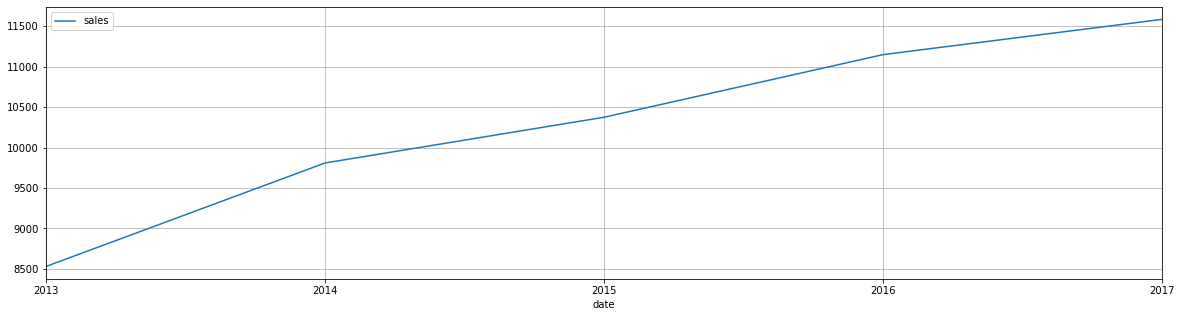

In [9]:
df_store_2_item_28_time.resample('A').sum().plot(grid=True,figsize=(20,5))
plt.show()

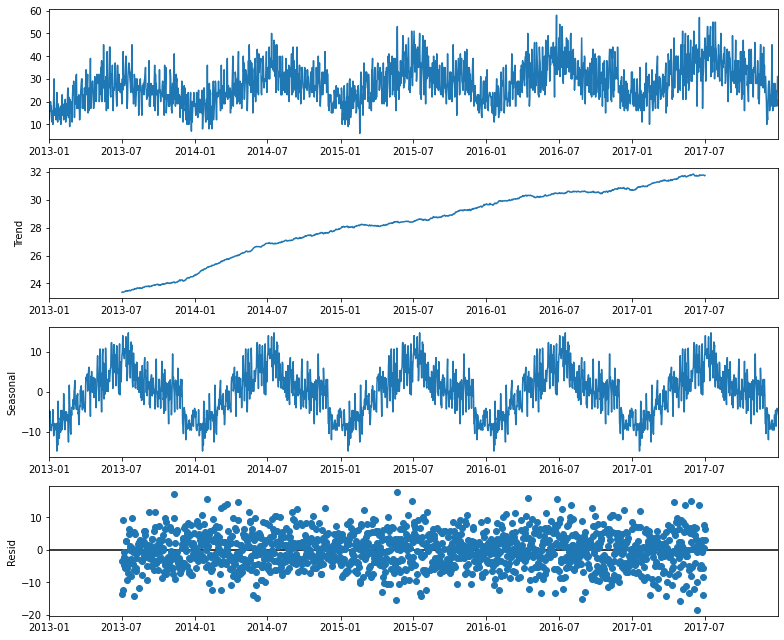

In [10]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9
decomposition = sm.tsa.seasonal_decompose(df_store_2_item_28_time, 
                                         model = 'additive',
                                         period=365) 
fig = decomposition.plot()
plt.show()

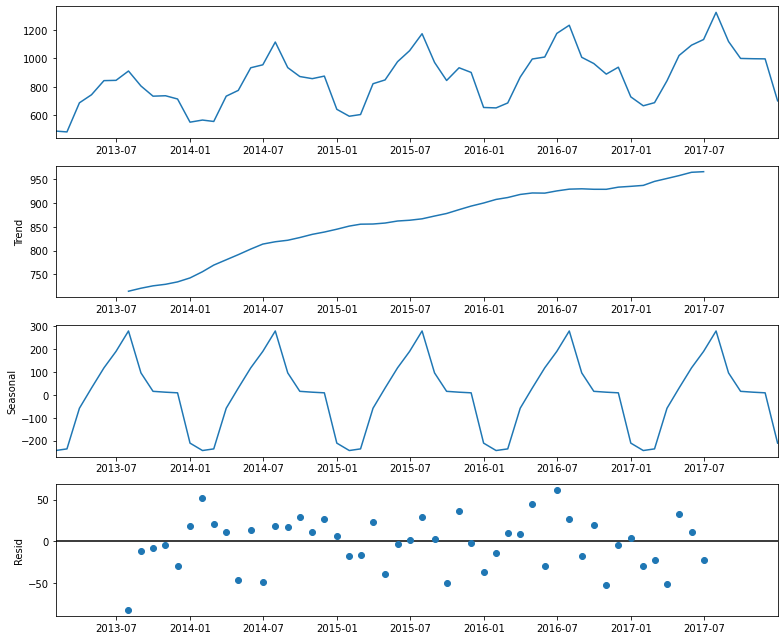

In [11]:
decomposition = sm.tsa.seasonal_decompose(df_store_2_item_28_time.resample('M').sum(), 
                                          model = 'additive',
                                         period=12) 
fig = decomposition.plot()
plt.show()

From the decomposition above we can conclude:

1. There is a `upward trend` on sales, i.e., our time series is `not stationary`.
2. From the seasonal component we can observe that the model is `additive`, since the seasonal component is similar (not getting multiplied) over the period of time.
3. Also we can observe on the seasonal component `seasonality` in sales with lower sales in January and higher sales in July.


# Forecasting with Facebook Prophet

## Prepare Data for Prophet

Prophet requires as input a dataframe with two columns:

* `ds`: datetime column
* `y`: numeric column which represents the measurement we wish to forecast.

Our data is almost ready. We just need to rename columns `date` and `sales`, respectively, as `ds` and `y`.

In [12]:
# rename date and sales, respectively ds and y
df_store_2_item_28.columns = ['ds','y']
df_store_2_item_28.head()

,ds,y
0,2013-01-01,12
1,2013-01-02,16
2,2013-01-03,16
3,2013-01-04,20
4,2013-01-05,16


In [13]:
df_store_2_item_28.tail()

,ds,y
1821,2017-12-27,19
1822,2017-12-28,21
1823,2017-12-29,18
1824,2017-12-30,24
1825,2017-12-31,31


## Train Model

To train a model in Prophet, first we create an instance of the model class and then we call the fit method. 

In principle, you don't need to specify any hyparameters. One important exception is `seasonality_mode`. It is important to set this parameter to `multiplicative` if your model is multiplicative since Prophet is based on an additive model. As we saw previously, the seasonality in our model follows an additive behavior. Therefore, there is no need to set `seasonality_mode` as multiplicative.


Although Prophet is able to find automatically a good set of hyperparameters, we will see later that some fine tuning can improve performance. Specially, applying your knowledge of the business case might make a huge difference even if Prophet has the power of handling many things by itself.

Just to exemplify, I'll include the parameter `interval_width` that sets the confidence interval. 

To know more about how to tweak those parameters in your favor check [Prophet documentation](https://facebook.github.io/prophet/docs/quick_start.html).


In [14]:
m = Prophet(interval_width=0.95) #by default is 80%
model = m.fit(df_store_2_item_28)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## Forecast

In order to forecast we first need to create a dataframe that will save our predictions. Method `make_future_dataframe` builds a dataframe that extends into the future a specified number of days. In our case, we will predict 90 days into the future. 

By default the dataframe created includes the dates from the history, so we see the model fit as well.

In [15]:
future = m.make_future_dataframe(periods=90) 
future.head()

,ds
0,2013-01-01
1,2013-01-02
2,2013-01-03
3,2013-01-04
4,2013-01-05


In [16]:
future.tail()

,ds
1911,2018-03-27
1912,2018-03-28
1913,2018-03-29
1914,2018-03-30
1915,2018-03-31


In [17]:
df_store_2_item_28.tail()

,ds,y
1821,2017-12-27,19
1822,2017-12-28,21
1823,2017-12-29,18
1824,2017-12-30,24
1825,2017-12-31,31


To make predictions we apply method `predict` on the `future` dataframe that we have just generated.

### Forecast Dataframe

In [18]:
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,22.238247,2.547104,22.406686,22.238247,22.238247,-9.684228,-9.684228,-9.684228,-2.316635,-2.316635,-2.316635,-7.367593,-7.367593,-7.367593,0.0,0.0,0.0,12.554018
1,2013-01-02,22.246006,2.066333,23.656151,22.246006,22.246006,-10.080508,-10.080508,-10.080508,-2.724681,-2.724681,-2.724681,-7.355826,-7.355826,-7.355826,0.0,0.0,0.0,12.165498
2,2013-01-03,22.253765,4.618319,25.497610,22.253765,22.253765,-7.527825,-7.527825,-7.527825,-0.167202,-0.167202,-0.167202,-7.360624,-7.360624,-7.360624,0.0,0.0,0.0,14.725940
3,2013-01-04,22.261525,5.770464,27.966759,22.261525,22.261525,-5.071376,-5.071376,-5.071376,2.309826,2.309826,2.309826,-7.381201,-7.381201,-7.381201,0.0,0.0,0.0,17.190149
4,2013-01-05,22.269284,7.516292,29.275908,22.269284,22.269284,-3.660186,-3.660186,-3.660186,3.756213,3.756213,3.756213,-7.416399,-7.416399,-7.416399,0.0,0.0,0.0,18.609098


The `forecast dataframe` contains Prophet’s prediction for sales. Because we've also passed historical dates, it provides an in-sample fit that we can use to evaluate our model.

As you can see, `forecast` includes a column `yhat` with the forecast, as well as columns for components and uncertainty intervals.

### Forecast Plot

To plot the forecast you just need to call method `.plot()` on your forecast dataframe.

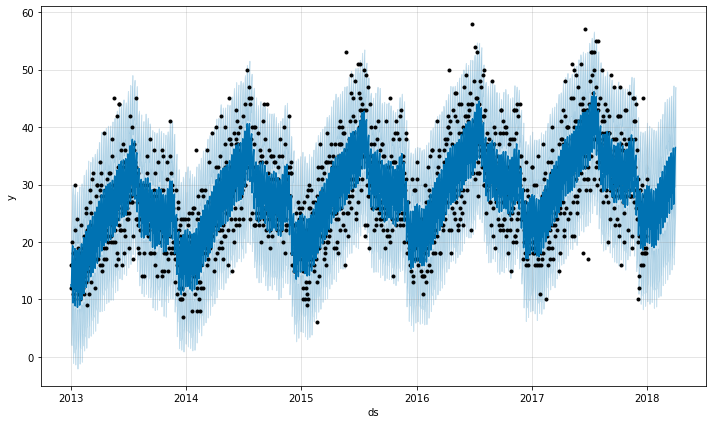

In [19]:
plot1 = m.plot(forecast)

In the forecast plot above, deep blue line is forecast sales `forecast['y_hat']`, black dots are actual sales `forecast['y']`. The light blue shade is 95% confidence interval around the forecast. The uncertainty interval in this region is bounded by `forecast['yhat_lower']` and `forecast['yhat_upper']` values.

### Trend Changepoints

Real life time series such as this one, frequently have abrupt changes in their trajectories. These `changepoints` sign abrupt changes in the time series caused, for instances, by new product launch, unforeseen calamity. Prophet will automatically detect these changepoints and will allow the trend to adapt appropriately. At these points, the growth rate is allowed to change making the model more flexible. This may cause overfitting or underfitting.

A parameter called `changepoint_prior_scale` could be used to adjust the trend flexibility and tackle overfitting and underfitting. Higher value fits a more flexible curve to the time series.

By default changepoints are only inferred for the first 80% of the time series, but you can change it by making use of the `changepoint_range` argument of the model.  

It is also possible to add your own changepoints manually, using the `changepoints` argument.

If you want to know more about changepoints and Prophet check [this](https://facebook.github.io/prophet/docs/trend_changepoints.html) out.

In the plot below, the dotted lines represent the changepoints for the given time series.

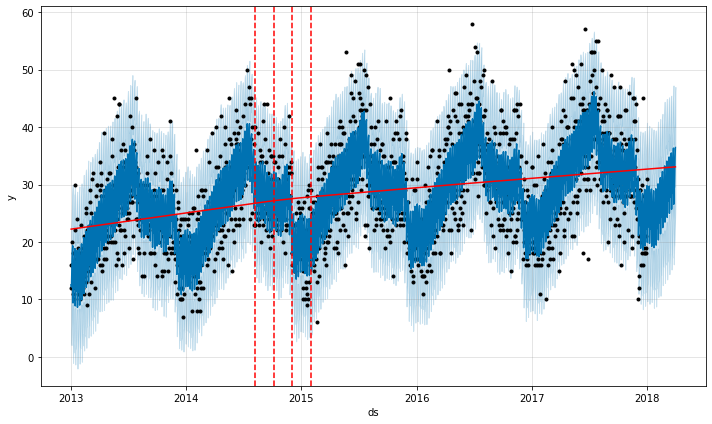

In [20]:
from fbprophet.plot import add_changepoints_to_plot

plot1 = m.plot(forecast)
a = add_changepoints_to_plot(plot1.gca(),m,forecast)

### Component Plots

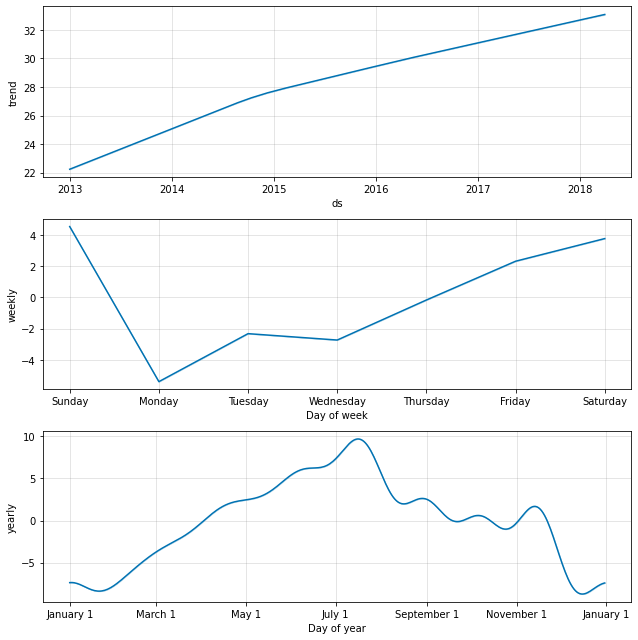

In [21]:
plot2 = m.plot_components(forecast)

We can observe the following on forecast components plotted above:

* `Trend component`:
    - The trend upwards. 
* `Weekly seasonality component`:
    - The weekly seasonality shows that people buy more on weekends. In particular, we observe a drop on sales from Sunday to Monday. This might point to a holiday effect.
* `Yearly seasonality component`:
    - As observe previously the volume of sales is higher in July and lower in January. This peak in sales in July might mean seasonal sales with high discount prices.
    
Holidays, special events, as well as seasonality can be explored to improve your model. For more information on how to use this information check Prophet's documentation section [`Seasonality, Holiday Effects, And Regressors`](https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html).


## Evaluate model

How this model is performing?

The forecast dataframe includes predictions made on the training data dates. Therefore, we can use this in-sample fit to evaluate our model.

In [22]:
df_merge = pd.merge(df_store_2_item_28, forecast[['ds','yhat_lower','yhat_upper','yhat']],on='ds')
df_merge = df_merge[['ds','yhat_lower','yhat_upper','yhat','y']]
df_merge.head()

,ds,yhat_lower,yhat_upper,yhat,y
0,2013-01-01,2.547104,22.406686,12.554018,12
1,2013-01-02,2.066333,23.656151,12.165498,16
2,2013-01-03,4.618319,25.497610,14.725940,16
3,2013-01-04,5.770464,27.966759,17.190149,20
4,2013-01-05,7.516292,29.275908,18.609098,16


In [23]:
df_merge.tail()

,ds,yhat_lower,yhat_upper,yhat,y
1821,2017-12-27,11.258180,31.969672,22.243963,19
1822,2017-12-28,14.359668,36.031598,24.899704,21
1823,2017-12-29,16.768288,37.225445,27.461764,18
1824,2017-12-30,19.175950,38.975582,28.978287,24
1825,2017-12-31,20.190525,40.752158,29.800588,31


To evaluate this model we will be using `MAE` and `MAPE`, as done previously for the SARIMAX models. Like this, we can compare and find out which model is the best model.

In [24]:
# calculate MAE between observed and predicted values 
y_true = df_merge['y'].values
y_pred = df_merge['yhat'].values
mae_01 = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae_01)

MAE: 4.275


In [25]:
mape_01 = mean_absolute_percentage_error(y_true, y_pred)
print('MAPE: %.3f' % mape_01)

MAPE: 0.169


In addition, to calculating metrics let's plot both actual and predicted data.

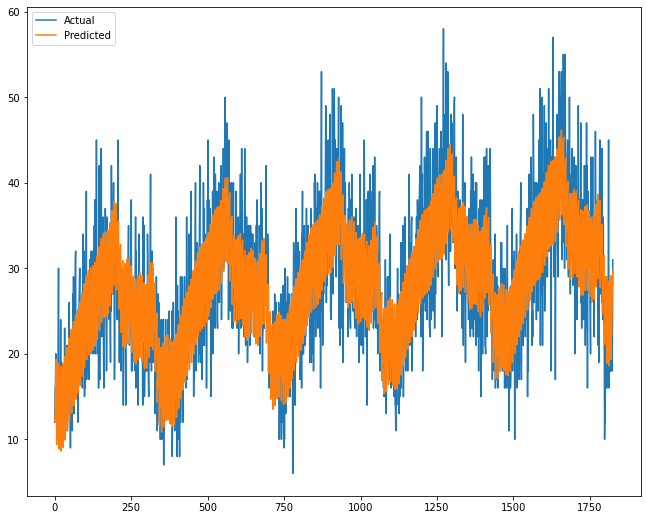

In [26]:
# plot expected vs actual
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()


From the plot, it seems that the model is able to fit the data points well.

### Prophet's Diagnostic Tools

As part of the evaluation process we can make good use of some [diagnostic tools provided by Prophet](https://facebook.github.io/prophet/docs/diagnostics.html), such as `Cross Validation` and `Hyperparameter tuning`.

#### Cross Validation

Prophet includes functionality for time series [cross validation](https://facebook.github.io/prophet/docs/diagnostics.html#cross-validation) to measure forecast error by comparing the predicted values with the actual values.

To apply the `cross_validation` function, we specify the forecast horizon (`horizon`), then optionally the size of the initial training period (`initial`) and the spacing between cutoff dates (`period`).

In [27]:
df_store_2_item_28.shape

(1826, 2)

In [28]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, horizon='90 days')
# df_cv = cross_validation(m, initial='270 days', period='45 days', horizon = '90 days')
df_cv.head()

INFO:fbprophet:Making 31 forecasts with cutoffs between 2014-01-21 00:00:00 and 2017-10-02 00:00:00


  0%|          | 0/31 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2014-01-22,16.278299,7.094475,25.788521,16,2014-01-21
1,2014-01-23,18.260338,8.659477,27.762194,26,2014-01-21
2,2014-01-24,20.096471,10.809596,28.331145,26,2014-01-21
3,2014-01-25,20.280619,11.341809,29.295036,20,2014-01-21
4,2014-01-26,21.125893,11.535574,29.888428,19,2014-01-21


You can also just set the horizon and let prophet choose the other parameters.

In [29]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
2785,2017-12-27,22.971234,12.613112,32.503232,19,2017-10-02
2786,2017-12-28,25.532726,15.564267,36.270394,21,2017-10-02
2787,2017-12-29,28.044423,17.167200,37.937013,18,2017-10-02
2788,2017-12-30,29.557612,19.082619,39.891501,24,2017-10-02
2789,2017-12-31,30.232912,19.748281,40.714630,31,2017-10-02


In [30]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,9 days,34.865980,5.904742,4.821103,0.182401,0.139365,0.910394
1,10 days,34.930593,5.910211,4.819824,0.185923,0.142588,0.917563
2,11 days,35.996069,5.999672,4.843626,0.187536,0.140296,0.906810
3,12 days,35.058428,5.921016,4.746271,0.183065,0.137323,0.903226
4,13 days,32.307738,5.683990,4.551270,0.178467,0.129020,0.921147


In [31]:
df_p.tail()

,horizon,mse,rmse,mae,mape,mdape,coverage
77,86 days,34.033481,5.833822,4.651667,0.184980,0.132813,0.910394
78,87 days,32.394407,5.691608,4.528940,0.172827,0.130093,0.906810
79,88 days,31.621280,5.623280,4.542671,0.168509,0.132813,0.913978
80,89 days,32.738699,5.721774,4.638626,0.172202,0.132812,0.906810
81,90 days,33.118107,5.754833,4.705584,0.171990,0.140029,0.910394


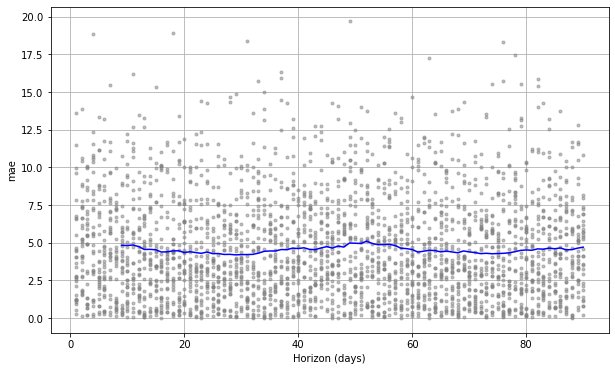

In [32]:
from fbprophet.plot import plot_cross_validation_metric

plot3 = plot_cross_validation_metric(df_cv, metric='mae')

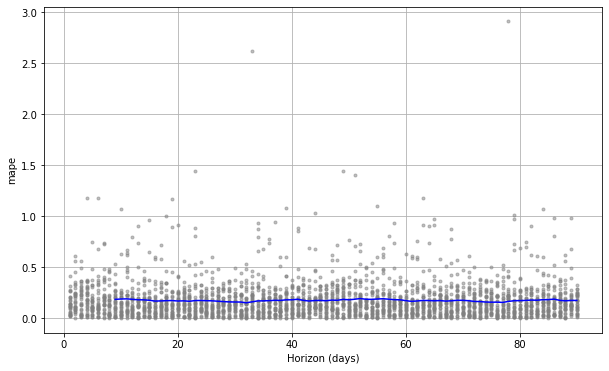

In [33]:
plot4 = plot_cross_validation_metric(df_cv, metric='mape')

The blue line shows the MAE (1st plot above) and MAPE (2nd plot above), where the mean is taken over a rolling window of the dots. 

We see for this forecast that, considering MAPE, errors around 18.50% are typical for predictions 9 days into the future, and that errors decrease to around 17.20% for predictions that are 90 days out.

#### Fine tuning hyperparameters

Is it possible to make it better??

We can apply grid search and try to fine tune the hyperparameters. Let's apply it and try to find hyperparameters that may give us lower MAPE.

Here we try different values of `changepoint_prior_scale` and `seasonality_prior_scale`. `changepoint_prior_scale` determines the flexibility of the trend, and in particular how much the trend changes at the trend changepoints.While `seasonality_prior_scale` controls the flexibility of the seasonality. For more details, check section [Hyperparameter tuning](https://facebook.github.io/prophet/docs/diagnostics.html#hyperparameter-tuning) of Prophet's documentation.

In [34]:
# Python
import itertools

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],   
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
maes = []  # Store the MAE for each params here
mapes = [] # Store the MAPE for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(df_store_2_item_28)  # Fit model with given params
    df_cv = cross_validation(m, horizon='90 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    maes.append(df_p['mae'].values[0])
    mapes.append(df_p['mape'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['mae'] = maes
tuning_results['mape'] = mapes

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 31 forecasts with cutoffs between 2014-01-21 00:00:00 and 2017-10-02 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000001CEC4820D90>
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 31 forecasts with cutoffs between 2014-01-21 00:00:00 and 2017-10-02 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000001CEC37061F0>
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 31 forecasts with cutoffs between 2014-01-21 00:00:00 and 2017-10-02 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000001CEC3706D60>
INFO:fbprophet:Disabling daily season

In [35]:
tuning_results_df = pd.DataFrame(tuning_results)

In [36]:
tuning_results_df.sort_values(['mae','mape'])

,changepoint_prior_scale,seasonality_prior_scale,mae,mape
6,0.010,1.00,4.562574,0.174880
10,0.100,1.00,4.568946,0.171520
11,0.100,10.00,4.569038,0.171525
7,0.010,10.00,4.569612,0.175375
5,0.010,0.10,4.572813,0.175333
9,0.100,0.10,4.574100,0.171796
15,0.500,10.00,4.662864,0.173795
14,0.500,1.00,4.666155,0.173971
13,0.500,0.10,4.675591,0.174055
3,0.001,10.00,4.757260,0.186370


In [37]:
tuning_results_df.sort_values(['mape','mae'])

,changepoint_prior_scale,seasonality_prior_scale,mae,mape
10,0.100,1.00,4.568946,0.171520
11,0.100,10.00,4.569038,0.171525
9,0.100,0.10,4.574100,0.171796
15,0.500,10.00,4.662864,0.173795
14,0.500,1.00,4.666155,0.173971
13,0.500,0.10,4.675591,0.174055
6,0.010,1.00,4.562574,0.174880
5,0.010,0.10,4.572813,0.175333
7,0.010,10.00,4.569612,0.175375
4,0.010,0.01,4.809772,0.184803


Choosing the parameters that give us the smallest MAPE:

In [38]:
best_params = all_params[np.argmin(mapes)]
print(best_params)

{'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 1.0}


## Best Model

In [39]:
m = Prophet(interval_width=0.95, weekly_seasonality=True, 
            changepoint_prior_scale=best_params['changepoint_prior_scale'], 
            seasonality_prior_scale=best_params['seasonality_prior_scale'])
model = m.fit(df_store_2_item_28)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [40]:
future = m.make_future_dataframe(periods=90) #to predict 90 days in the future

In [41]:
forecast = m.predict(future)

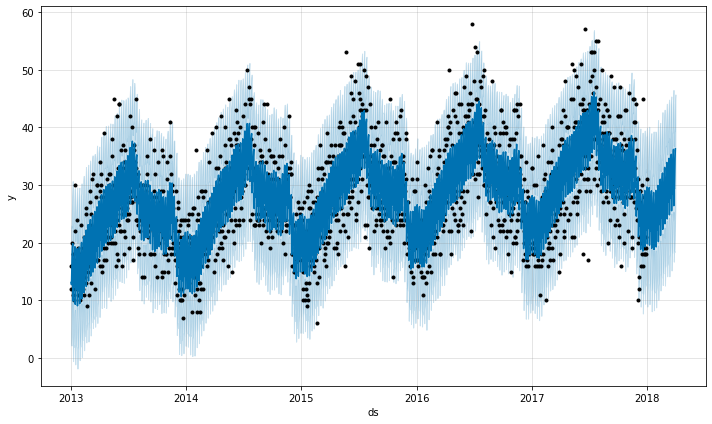

In [42]:
plot5 = m.plot(forecast)

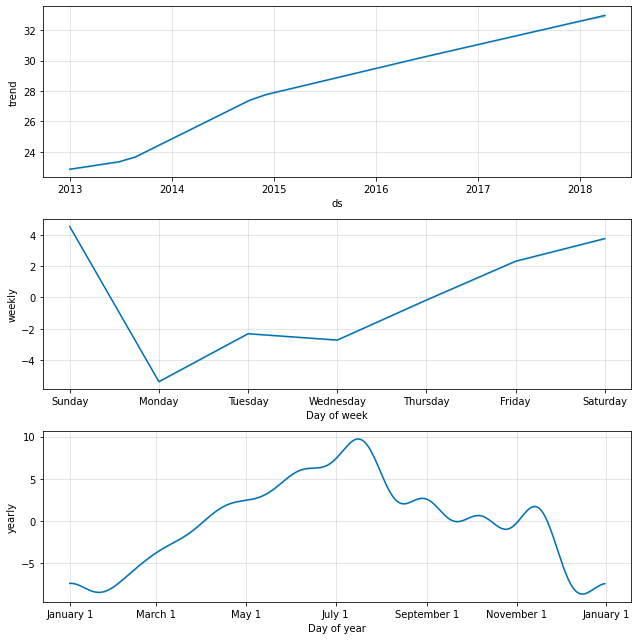

In [43]:
plot6 = m.plot_components(forecast)

In [44]:
df_merge = pd.merge(df_store_2_item_28, forecast[['ds','yhat_lower','yhat_upper','yhat']],on='ds')
df_merge = df_merge[['ds','yhat_lower','yhat_upper','yhat','y']]

In [45]:
# calculate MAE between expected and predicted values for december
y_true = df_merge['y'].values
y_pred = df_merge['yhat'].values
mae_02 = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae_02)

MAE: 4.268


In [46]:
mape_02 = mean_absolute_percentage_error(y_true, y_pred)
print('MAPE: %.3f' % mape_02)

MAPE: 0.168


There is no relevant difference when comparing our first model and the model with smaller MAPE chosen by applying hyperparameter tunning.

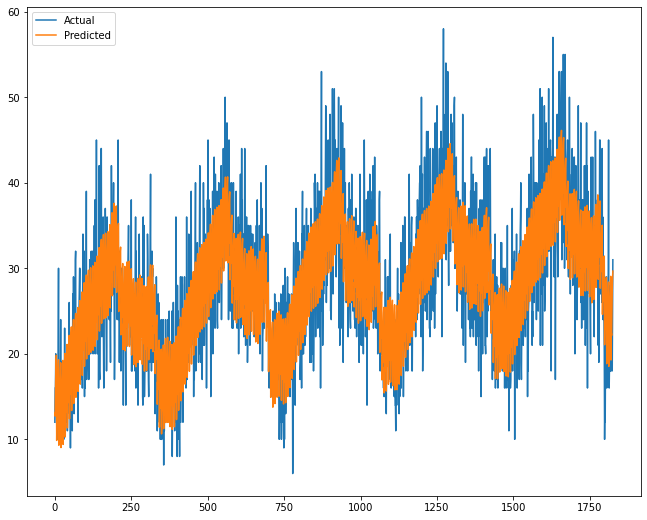

In [47]:
# plot expected vs actual
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

In [48]:
y_true

array([12, 16, 16, ..., 18, 24, 31], dtype=int64)

In [49]:
df_cv = cross_validation(m, horizon='90 days')
# df_cv = cross_validation(m, initial='270 days', period='45 days', horizon = '90 days')

INFO:fbprophet:Making 31 forecasts with cutoffs between 2014-01-21 00:00:00 and 2017-10-02 00:00:00


  0%|          | 0/31 [00:00<?, ?it/s]

In [50]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,9 days,34.930769,5.910226,4.831308,0.181507,0.141842,0.892473
1,10 days,35.149443,5.928697,4.851150,0.185567,0.143824,0.892473
2,11 days,36.054900,6.004573,4.848948,0.186161,0.143785,0.885305
3,12 days,35.067543,5.921785,4.747771,0.181602,0.135680,0.888889
4,13 days,32.302968,5.683570,4.554207,0.177082,0.129726,0.910394


In [51]:
df_p.tail()

,horizon,mse,rmse,mae,mape,mdape,coverage
77,86 days,34.338268,5.859886,4.668017,0.185083,0.138011,0.906810
78,87 days,32.552973,5.705521,4.550419,0.172949,0.136590,0.913978
79,88 days,31.864211,5.644839,4.561858,0.168445,0.138107,0.921147
80,89 days,33.031851,5.747334,4.664934,0.172410,0.138107,0.913978
81,90 days,33.393735,5.778731,4.719538,0.171820,0.143363,0.917563


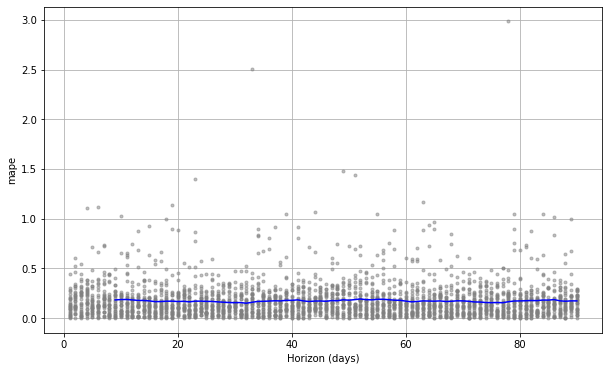

In [52]:
plot7 = plot_cross_validation_metric(df_cv, metric='mape')

Let's compare the values of the metrics of the two models where `Prophet_01` is our first model and `Prophet_02` is the model with smallest MAPE provided by the fine-tuning process.

In [53]:
metrics_prophet_01 = [round(mae_01,3), 
                 round(mape_01,3)]

metrics_prophet_02 = [round(mae_02,3), 
                 round(mape_02,3)]

In [54]:
pd.DataFrame({'metrics':['MAE','MAPE'],
              'Prophet_01':metrics_prophet_01, 
              'Prophet_02':metrics_prophet_02,
             })

,metrics,Prophet_01,Prophet_02
0,MAE,4.275,4.268
1,MAPE,0.169,0.168


The model pointed out by fine-tuning (`Prophet_02`) gave us a slight improvement when compared with previous model (`Prophet_01`).

## Best Model adding US Holidays

What if we include US-Holidays? Would it improve further the results obtained by our last model?

Let's use for this `add_country_holidays(country_name='US')` provided by Prophet.

In [55]:
m = Prophet(interval_width=0.95, weekly_seasonality=True, 
            changepoint_prior_scale=best_params['changepoint_prior_scale'], 
            seasonality_prior_scale=best_params['seasonality_prior_scale'])
m.add_country_holidays(country_name='US')
model = m.fit(df_store_2_item_28)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


These are the US holidays included:

In [56]:
# holidays included
m.train_holiday_names

0                  New Year's Day
1      Martin Luther King Jr. Day
2           Washington's Birthday
3                    Memorial Day
4                Independence Day
5                       Labor Day
6                    Columbus Day
7                    Veterans Day
8                    Thanksgiving
9                   Christmas Day
10       Christmas Day (Observed)
11      New Year's Day (Observed)
12        Veterans Day (Observed)
13    Independence Day (Observed)
dtype: object

In [57]:
future = m.make_future_dataframe(periods=90) #to predict 90 days in the future

In [58]:
forecast = m.predict(future)

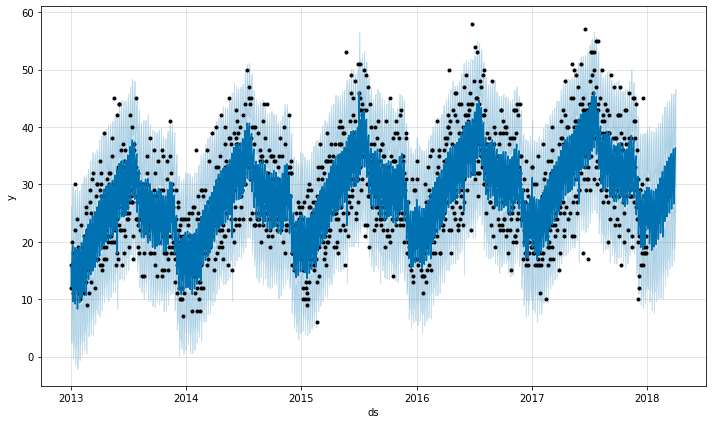

In [59]:
plot5 = m.plot(forecast)

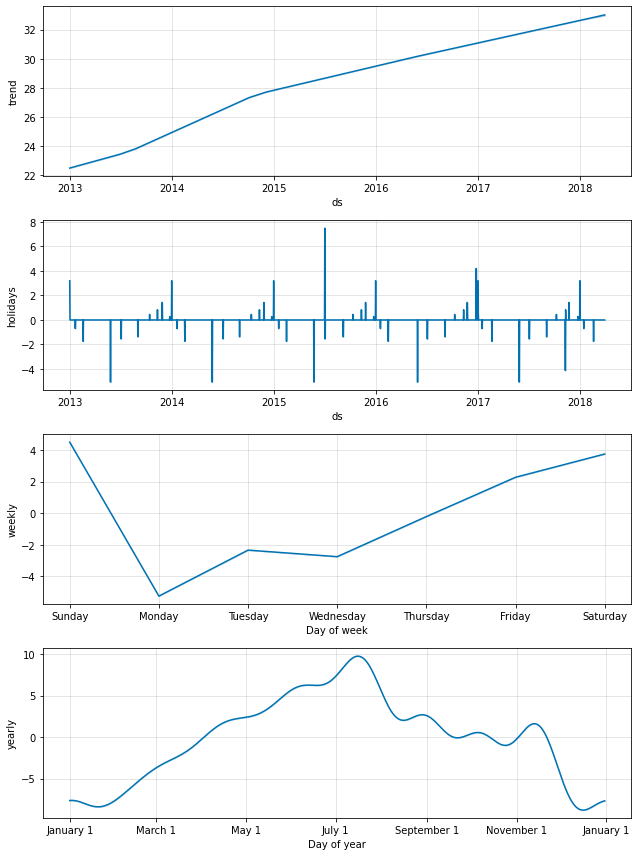

In [60]:
plot6 = m.plot_components(forecast)

Note that now the plots of components include holidays.

In [61]:
df_merge = pd.merge(df_store_2_item_28, forecast[['ds','yhat_lower','yhat_upper','yhat']],on='ds')
df_merge = df_merge[['ds','yhat_lower','yhat_upper','yhat','y']]

In [62]:
# calculate MAE between expected and predicted values for december
y_true = df_merge['y'].values
y_pred = df_merge['yhat'].values
mae_03 = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae_03)

MAE: 4.250


In [63]:
mape_03 = mean_absolute_percentage_error(y_true, y_pred)
print('MAPE: %.3f' % mape_03)

MAPE: 0.168


By including, holidays in US provided by Prophet we succeed in improving a bit our model. Even if it was not a significative improvement it shows that changing parameters based on our business case can play in our favour.

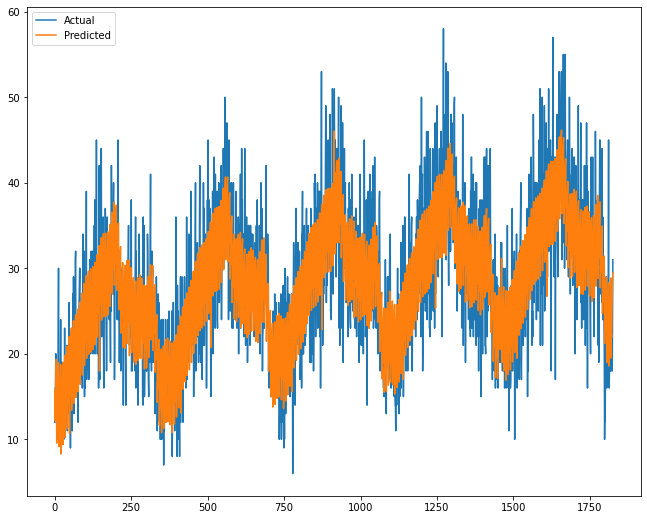

In [64]:
# plot expected vs actual
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

In [65]:
df_cv = cross_validation(m, horizon='90 days')
# df_cv = cross_validation(m, initial='270 days', period='45 days', horizon = '90 days')

INFO:fbprophet:Making 31 forecasts with cutoffs between 2014-01-21 00:00:00 and 2017-10-02 00:00:00


  0%|          | 0/31 [00:00<?, ?it/s]

Putting the results of the three Prophet models together considering forecasting in sample:

In [66]:
metrics_prophet_03 = [round(mae_03,3), 
                 round(mape_03,3)]

In [67]:
pd.DataFrame({'metrics':['MAE','MAPE'],
              'Prophet_01':metrics_prophet_01, 
              'Prophet_02':metrics_prophet_02,
              'Prophet_03':metrics_prophet_03,
             })

,metrics,Prophet_01,Prophet_02,Prophet_03
0,MAE,4.275,4.268,4.250
1,MAPE,0.169,0.168,0.168


Notice that by adding holidays we obtained a slight better model `Prophet_03` when compared with previous ones, considering both MAE and MAPE metrics.

In [68]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,9 days,35.668710,5.972329,4.868088,0.183321,0.140278,0.906810
1,10 days,35.995957,5.999663,4.903734,0.188143,0.144311,0.906810
2,11 days,36.879731,6.072868,4.900145,0.188641,0.144311,0.896057
3,12 days,35.468824,5.955571,4.775741,0.183272,0.139337,0.903226
4,13 days,32.568653,5.706895,4.573187,0.178416,0.130151,0.917563


In [69]:
df_p.tail()

,horizon,mse,rmse,mae,mape,mdape,coverage
77,86 days,34.513014,5.874778,4.679215,0.185082,0.136060,0.913978
78,87 days,32.896862,5.735579,4.566939,0.173121,0.135813,0.917563
79,88 days,31.764622,5.636011,4.561730,0.167937,0.135813,0.924731
80,89 days,33.190061,5.761082,4.677818,0.173134,0.135676,0.913978
81,90 days,33.606996,5.797154,4.740115,0.172782,0.140024,0.917563


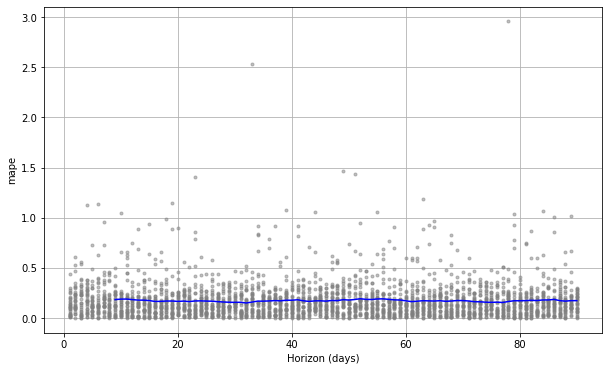

In [70]:
plot7 = plot_cross_validation_metric(df_cv, metric='mape')

# Saving and Loading the Best model

Now that you found your best model, it is time to save it for future use.

Saving Prophet models is a bit different than saving SARIMAX models. In Python, Prophet models should not be saved with pickle; the Stan backend attached to the model object will not pickle well, and will produce issues under certain versions of Python. Instead, you should use the built-in serialization functions to serialize the model to json.

In [71]:
import json
from fbprophet.serialize import model_to_json, model_from_json

## Save model

In [72]:
with open('../model/prophet_model.json', 'w') as fout:
    json.dump(model_to_json(m), fout)  # Save model

FileNotFoundError: [Errno 2] No such file or directory: '../model/prophet_model.json'

## Load model

In [ ]:
with open('../model/prophet_model.json', 'r') as fin:
    m = model_from_json(json.load(fin))  # Load model

# Comparing all results - SARIMA models vs Prophet models

Below we compare the performance of SARIMAX models ([notebook 02-Forecasting_with_SARIMAX.ipynb](https://github.com/MKB-Datalab/time-series-analysis-with-SARIMAX-and-Prophet/blob/master/notebooks/02-Forecasting_with_SARIMAX.ipynb)) and Prophet models.

In [ ]:
# load csv with metrics results for SARIMAX
sarimax_results = pd.read_csv("../data/processed/results_arima.csv")

# prophet results

prophet_results = pd.DataFrame({'metrics':['MAE','MAPE'],
              'Prophet_01':metrics_prophet_01, 
              'Prophet_02':metrics_prophet_02,
              'Prophet_03':metrics_prophet_03,
             })

# merge by columns metrics
sarimax_results.merge(prophet_results, on='metrics')


The Prophet models present better accuracy than the (S)ARIMA models, as show by the lowest values of MAE and MAPE. The best Prophet model has a MAE 32.38% lower than the MAE of the best SARIMA model. The MAPE of the best Prophet is 21.13% lower than the MAPE of the best SARIMA model.


# Conclusions 

In this section we presented `Facebook Prophet`. With our example, we could observe that in fact Prophet is easy to use. In our first model we didn’t make any choice and by letting Prophet choose automatically the hyperparameters we have already obtained a model with better performance than the best SARIMA model obtained in notebook [02-Forecasting_with_SARIMAX.ipynb](https://github.com/MKB-Datalab/time-series-analysis-with-SARIMAX-and-Prophet/blob/master/notebooks/02-Forecasting_with_SARIMAX.ipynb). 

By tweaking a bit, the hyperparameters we have improved our results. Adding holidays showed to be useful even if the improvement, in this case, was small.

We have also explored some of the evaluation tools provided by Prophet. 

If you want to go deeper and learn even more about Prophet visit its page[https://facebook.github.io/prophet/]. 
